**Importing Libraries**

In [1]:
import numpy as np
import pandas as pd  
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.base import TransformerMixin
from sklearn.preprocessing import (FunctionTransformer, StandardScaler) 
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from scipy.stats import boxcox 
from sklearn.model_selection import train_test_split, KFold , StratifiedKFold, cross_val_score, GridSearchCV, learning_curve, validation_curve
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from collections import Counter

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier, plot_importance
from sklearn.svm import SVC
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from time import time
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
import xgboost as xgb
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import SGDClassifier
from time import time
from sklearn.preprocessing import StandardScaler
from IPython.display import display
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
import lightgbm as lgb

import warnings
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

**Importing Dataset**

In [2]:
df = pd.read_csv('Glass Identification/glass.data',header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


# **Exploring Dataset**

1.Count of Null values

2.Shape of dataset

3.Uniques values

4.Drop Duplicates

1. Count of Null values

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       214 non-null    int64  
 1   1       214 non-null    float64
 2   2       214 non-null    float64
 3   3       214 non-null    float64
 4   4       214 non-null    float64
 5   5       214 non-null    float64
 6   6       214 non-null    float64
 7   7       214 non-null    float64
 8   8       214 non-null    float64
 9   9       214 non-null    float64
 10  10      214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


In [4]:
data = df

In [5]:
has_nan = data.isna().any().any()
if has_nan:
    print("The DataFrame contains NaN values.")
else:
    print("The DataFrame does not contain any NaN values.")

The DataFrame does not contain any NaN values.


2. Shape of the Dataset

In [6]:
data.shape

(214, 11)

3. Uniques values

Verifying whether there are columns containing only one unique value, as they will have no impact on our analysis.

In [7]:
# No unique values found

In [8]:
data.nunique(dropna=True)

0     214
1     178
2     142
3      94
4     118
5     133
6      65
7     143
8      34
9      32
10      6
dtype: int64

In [9]:
data.shape

(214, 11)

4. Drop Duplicates

In [10]:
data=data.drop_duplicates()
data.shape

(214, 11)

# **Statistics of Dataset**

## 1. *Descriptive statistics*

Summarizing the distribution of the numerical variables.

In [11]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,10
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,107.500000,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,61.920648,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,54.250000,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,107.500000,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,160.750000,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


## 2. Unique Value Count from each Column:

In [12]:
for col in df.columns:
    print(f'{col} : {len(set(df[col]))}')

0 : 214
1 : 178
2 : 142
3 : 94
4 : 118
5 : 133
6 : 65
7 : 143
8 : 34
9 : 32
10 : 6


# Data Preprocessing (Preparing Dataset)

## 1.Remove Index

In [13]:
df = pd.read_csv('Glass Identification/glass.data',header=None).iloc[:,1:]
df.head()

,1,2,3,4,5,6,7,8,9,10
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


## 2.Add meaningful column names 

In [14]:
df.columns = ['RI','Na','Mg','Al','Si','K','Ca','Ba','Fe','glass_type']
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,glass_type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [15]:
df.shape

(214, 10)

In [16]:
data=df

# Data Visualization

# 1. Unique Values and count plot of the unique values of the dependent variable:

In [17]:
data.iloc[:,-1].unique()

array([1, 2, 3, 5, 6, 7], dtype=int64)

In [18]:
data.iloc[:,-1].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: glass_type, dtype: int64

<AxesSubplot:xlabel='glass_type', ylabel='count'>

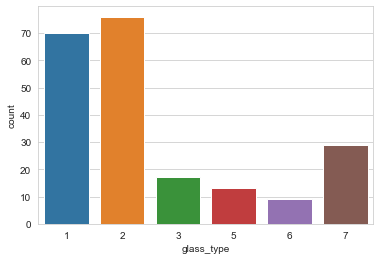

In [19]:
sns.countplot(x='glass_type', data=data)

## 2. Univariate Plots:

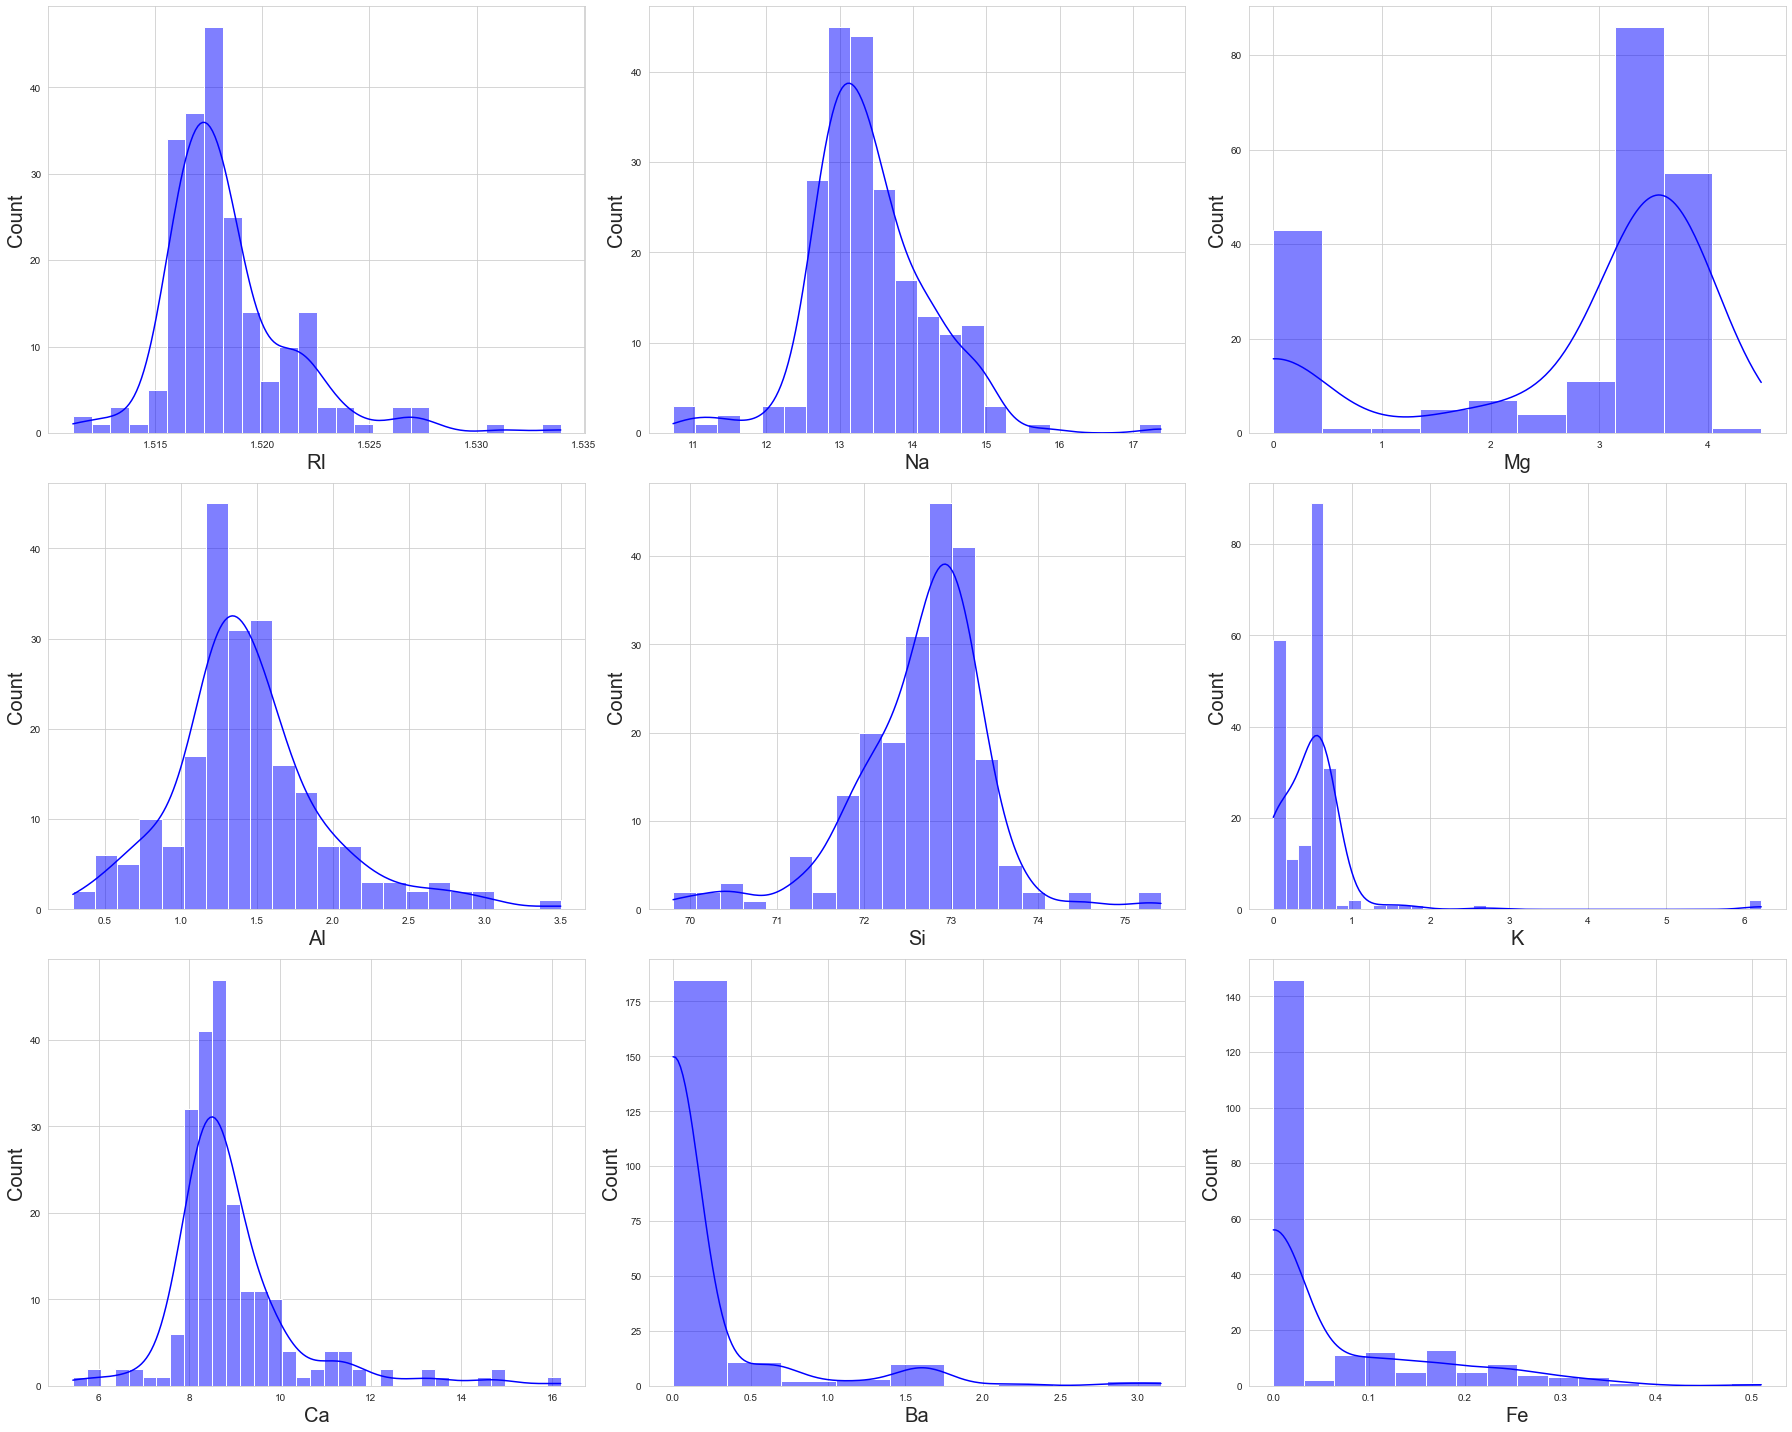

In [20]:
plt.figure(figsize = (25, 20))
plotnumber = 1

for col in df.columns:
    if plotnumber <= 9: 
        ax = plt.subplot(3, 3, plotnumber)
        sns.histplot(df[col],kde=True, color="blue")
        plt.xlabel(col, fontsize = 20)
        plt.ylabel("Count", fontsize = 20)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

**Outcomes** 
1. The results show that our dataset exhibits skewness, either in the positive or negative direction, and the data is not in a normalized form.

## (3. Multivariate Plots)

## 4. Pairplot

<Figure size 576x576 with 0 Axes>

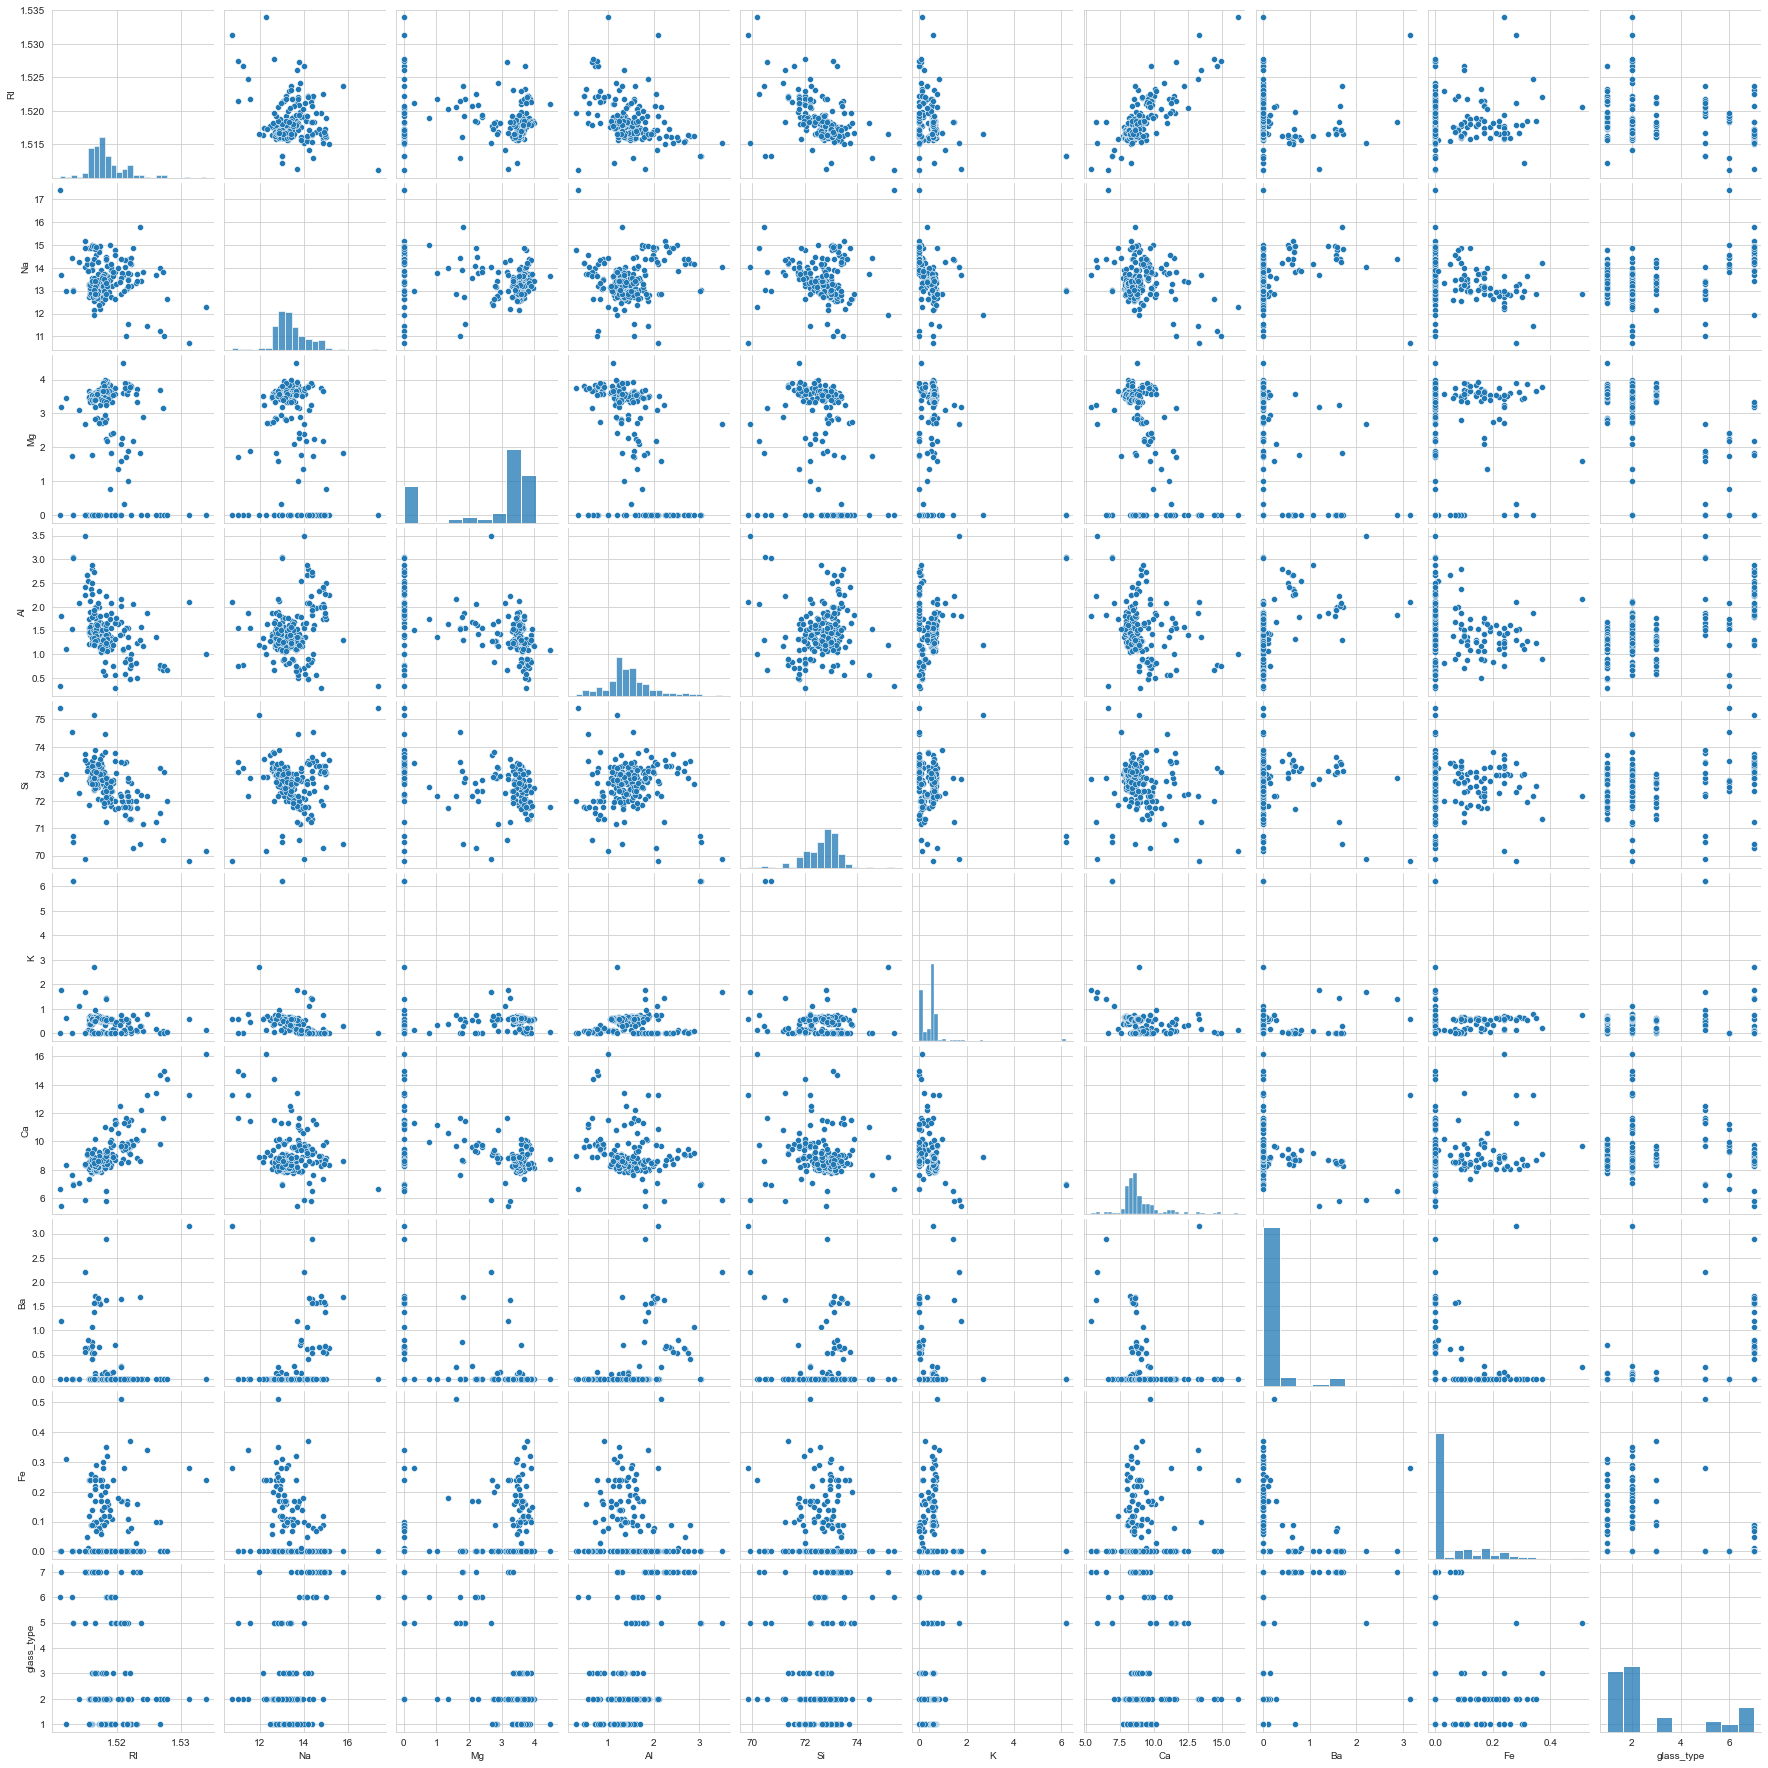

In [21]:
plt.figure(figsize=(8,8))
sns.pairplot(df,palette='coolwarm')
plt.show()

## 5. Boxplot

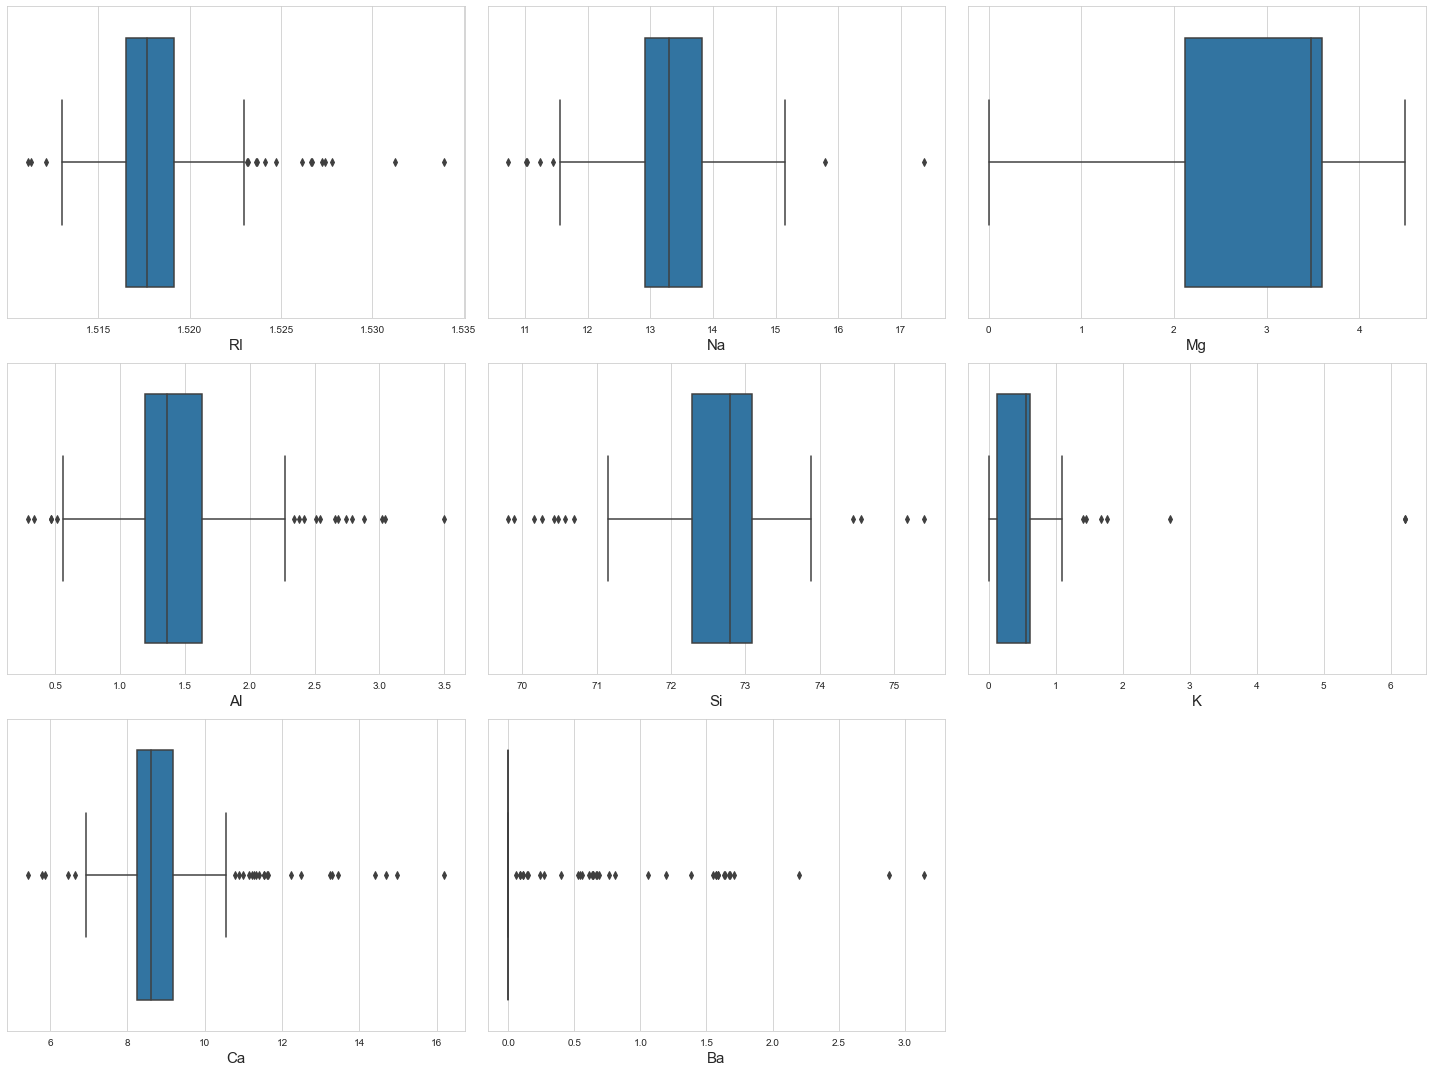

In [22]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for col in df.columns:
    if plotnumber <= 8:
        ax = plt.subplot(3, 3, plotnumber)
        sns.boxplot(df[col])
        plt.xlabel(col, fontsize = 15)
    
    plotnumber += 1
plt.tight_layout()
plt.show()

## 6. Heat map:

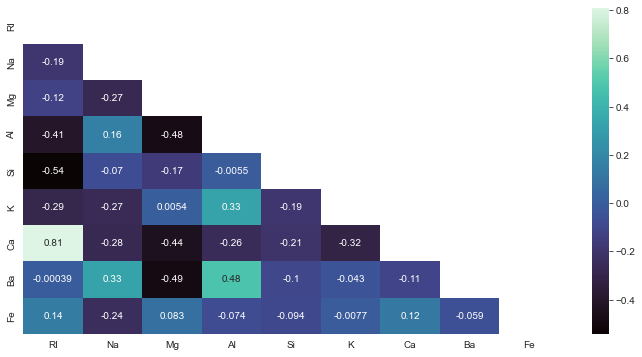

In [23]:
plt.subplots(figsize=(12, 6))
corr = df.iloc[:,:-1].corr()
ax = sns.heatmap(data=corr, cmap='mako', annot=True, mask=np.triu(np.ones_like(corr, dtype = bool)))

**Outcomes** 

1. The correlation between AI and Ba is moderate.
2. RI and Ca are strongly correlated with each other.

# Data Cleaning 

## 1. Check for missing/NaN values :

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   RI          214 non-null    float64
 1   Na          214 non-null    float64
 2   Mg          214 non-null    float64
 3   Al          214 non-null    float64
 4   Si          214 non-null    float64
 5   K           214 non-null    float64
 6   Ca          214 non-null    float64
 7   Ba          214 non-null    float64
 8   Fe          214 non-null    float64
 9   glass_type  214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [25]:
df.isna().sum()

RI            0
Na            0
Mg            0
Al            0
Si            0
K             0
Ca            0
Ba            0
Fe            0
glass_type    0
dtype: int64

**Outcomes** 

1. No missing values/ NaN are present in the dataset. The dataset is clean

## 2. Outlier Detection

In [26]:
def outlier_hunt(df):
    """
    Takes a dataframe df of features and returns a list of the indices
    corresponding to the observations containing more than 2 outliers. 
    """
    outlier_indices = []
    
    # iterate over features(columns)
    for col in df.columns.tolist():
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col],75)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > 2 )
    
    return multiple_outliers   

print('The dataset contains %d observations with more than 2 outliers' %(len(outlier_hunt(data.iloc[:,:-1]))))

The dataset contains 14 observations with more than 2 outliers


**Outcomes** 

1. So, out of 214, we have 14 points that are outliers.

## 3. Remove Outliers

Remove Unwanted data points : (14 Observations) 

In [27]:
df = pd.read_csv('Glass Identification/glass.data',header=None).iloc[:,1:]
df.columns = ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type']
outlier_indices = outlier_hunt(df.iloc[:,:-1])
df = df.drop(outlier_indices).reset_index(drop=True)

In [28]:
print(df.shape)

(200, 10)


**Outcomes** 

1. Removing observations with multiple outliers (more than 2) leaves us with 214-14 = 200 observations.

## 4. Glass type after removal of outliers

In [29]:
df['Type'].value_counts()

1    70
2    70
7    25
3    17
5    10
6     8
Name: Type, dtype: int64

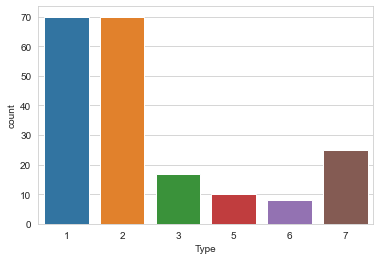

In [30]:
sns.countplot(df['Type'])
plt.show()

**Outcomes** 

1. No of observation have not decreased from the 1st and 2nd class.

# Scaling The Features

## 1. Seperating dependent and independent variables

In [31]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

## 2. Apply preprocessing scale

In [32]:
from sklearn import preprocessing
X=preprocessing.scale(X)

In [33]:
X

array([[ 1.21769482,  0.32505721,  1.23450049, ..., -0.14550936,
        -0.34158999, -0.59385208],
       [-0.24185619,  0.68743982,  0.58366648, ..., -1.03588923,
        -0.34158999, -0.59385208],
       [-0.85572617,  0.16560886,  0.54710277, ..., -1.08427944,
        -0.34158999, -0.59385208],
       ...,
       [ 1.06315412,  1.36871914, -2.04892053, ..., -0.44552867,
         4.18900112, -0.59385208],
       [-0.71406386,  1.39770975, -2.04892053, ..., -0.4068165 ,
         3.99562223, -0.59385208],
       [-0.45649604,  1.18028018, -2.04892053, ..., -0.27132391,
         4.27187779, -0.59385208]])

# Data Visualization after Preprocessing

In [34]:
X

array([[ 1.21769482,  0.32505721,  1.23450049, ..., -0.14550936,
        -0.34158999, -0.59385208],
       [-0.24185619,  0.68743982,  0.58366648, ..., -1.03588923,
        -0.34158999, -0.59385208],
       [-0.85572617,  0.16560886,  0.54710277, ..., -1.08427944,
        -0.34158999, -0.59385208],
       ...,
       [ 1.06315412,  1.36871914, -2.04892053, ..., -0.44552867,
         4.18900112, -0.59385208],
       [-0.71406386,  1.39770975, -2.04892053, ..., -0.4068165 ,
         3.99562223, -0.59385208],
       [-0.45649604,  1.18028018, -2.04892053, ..., -0.27132391,
         4.27187779, -0.59385208]])

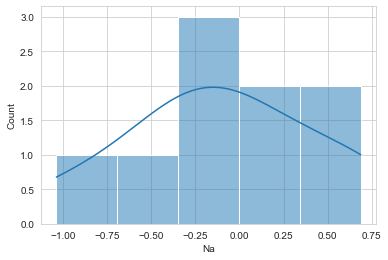

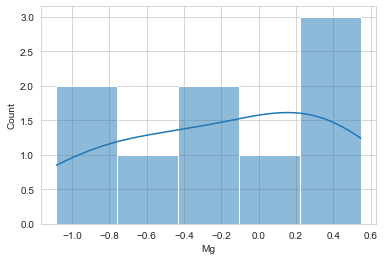

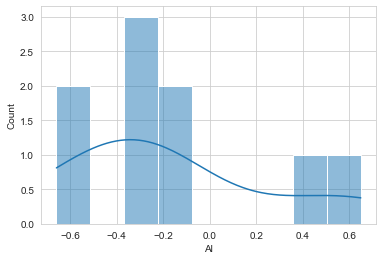

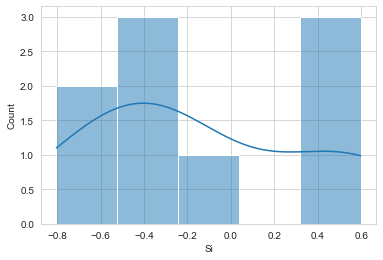

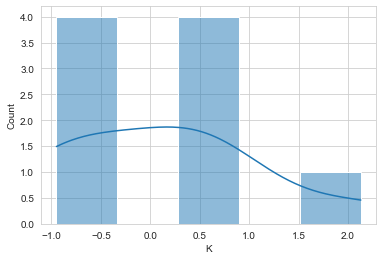

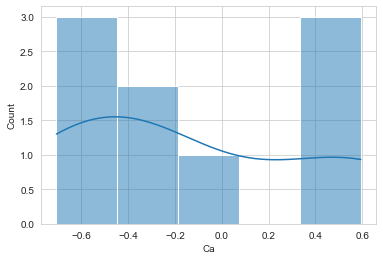

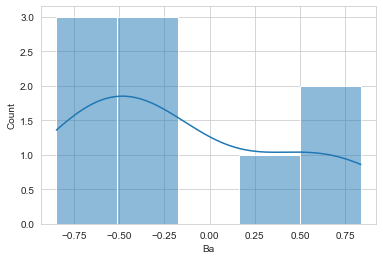

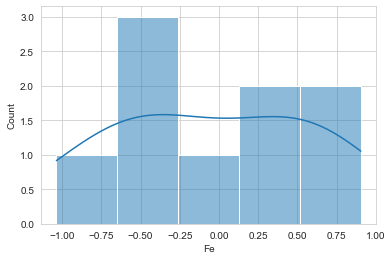

In [35]:
features= ['RI','Na','Mg','Al','Si','K','Ca','Ba','Fe']
for i in range(1,9):
    sns.histplot(X[i],kde=True)
    plt.xlabel(features[i])
    plt.show()

**Outcomes** 

We can observe that:
1. Skewness is reduced.
2. Data is more normalized.

# Split test train data

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Evaluators :

# General Code to predict and record the model performance

In [37]:
def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    results = {}

    predictions_train = learner.predict(X_train)
    predictions_test = learner.predict(X_test)
    
    results['acc_train'] = accuracy_score(y_train,predictions_train)
    results['acc_test'] = accuracy_score(y_test,predictions_test)

#     results['prec_train'] = precision_score(y_train,predictions_train)
#     results['prec_test'] = precision_score(y_test,predictions_test)

#     results['f1_train'] = f1_score(y_train,predictions_train)
#     results['f1_test'] = f1_score(y_test,predictions_test)
    
#     results['recall_train'] = recall_score(y_train, predictions_train)
#     results['recall_test'] = recall_score(y_test, predictions_test)
    
    try:
        y_prob_train = learner.predict_proba(X_train)[:, 1]
        y_prob_test = learner.predict_proba(X_test)[:, 1]
        results['auc_train'] = roc_auc_score(y_train,y_prob_train)
        results['auc_test'] = roc_auc_score(y_test,y_prob_test)
    except:
        pass
    
#     results['f_train'] = fbeta_score(y_train,predictions_train,beta=1)
#     results['f_test'] = fbeta_score(y_test,predictions_test,beta=1)
    
    results['classification_report_train'] = classification_report(y_train, predictions_train)
    results['classification_report_test'] = classification_report(y_test, predictions_test)
    
    for x in results:
        print(f"{x} : {results[x]}")
    
    return results

**Outcomes:**

1. accuracy, with auroc is recorded

# LogisticRegression

In [38]:
classifier = LogisticRegression(random_state = 42,penalty='l1',C=1,solver='liblinear')
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)
print(accuracy_score(y_true = y_test, y_pred = predictions))

0.65


In [39]:
logisticRegression_classifier = LogisticRegression(random_state = 42,penalty='l2',C=10,solver='lbfgs')
logisticRegression_classifier.fit(X_train,y_train)
predictions = logisticRegression_classifier.predict(X_test)
print(accuracy_score(y_true = y_test, y_pred = predictions))

0.675


#### Best performer among other parameters:

In [40]:
logisticRegression_classifier = LogisticRegression(random_state = 42,penalty='l1',C=10,solver='liblinear')
logisticRegression_classifier.fit(X_train, y_train)
predictions = logisticRegression_classifier.predict(X_test)
print(accuracy_score(y_true = y_test, y_pred = predictions))

0.725


In [41]:
logisticRegression_result = train_predict(logisticRegression_classifier, X_train.shape[0], X_train, y_train, X_test, y_test)

acc_train : 0.74375
acc_test : 0.725
classification_report_train :               precision    recall  f1-score   support

           1       0.70      0.77      0.74        56
           2       0.67      0.75      0.71        55
           3       0.00      0.00      0.00        14
           5       0.88      1.00      0.93         7
           6       0.86      1.00      0.92         6
           7       1.00      1.00      1.00        22

    accuracy                           0.74       160
   macro avg       0.68      0.75      0.72       160
weighted avg       0.69      0.74      0.71       160

classification_report_test :               precision    recall  f1-score   support

           1       0.69      0.79      0.73        14
           2       0.77      0.67      0.71        15
           3       0.33      0.33      0.33         3
           5       0.67      0.67      0.67         3
           6       1.00      1.00      1.00         2
           7       1.00      1.00   

# Kernel SVC (RFB)

In [42]:
kernel_svm = SVC(kernel='rbf',C=1000.0,gamma='auto')
kernel_svm.fit(X_train, y_train)
predictions = kernel_svm.predict(X_test)
print(accuracy_score(y_true = y_test, y_pred = predictions))

0.6


In [43]:
kernel_svm = SVC(kernel='rbf',C=10.0,gamma='scale')
kernel_svm.fit(X_train, y_train)
predictions = kernel_svm.predict(X_test)
print(accuracy_score(y_true = y_test, y_pred = predictions))

0.675


In [44]:
kernel_svm = SVC(kernel='rbf',C=100.0,gamma='scale')
kernel_svm.fit(X_train, y_train)
predictions = kernel_svm.predict(X_test)
print(accuracy_score(y_true = y_test, y_pred = predictions))

0.7


#### Best performer among other parameters:

In [45]:
kernel_svm = SVC(kernel='rbf',C=1.0,gamma='scale')
kernel_svm.fit(X_train, y_train)
predictions = kernel_svm.predict(X_test)
print(accuracy_score(y_true = y_test, y_pred = predictions))

0.725


In [46]:
kernel_svm_result = train_predict(kernel_svm, X_train.shape[0], X_train, y_train, X_test, y_test)

acc_train : 0.79375
acc_test : 0.725
classification_report_train :               precision    recall  f1-score   support

           1       0.72      0.86      0.78        56
           2       0.76      0.82      0.79        55
           3       0.00      0.00      0.00        14
           5       1.00      1.00      1.00         7
           6       1.00      1.00      1.00         6
           7       1.00      0.95      0.98        22

    accuracy                           0.79       160
   macro avg       0.75      0.77      0.76       160
weighted avg       0.73      0.79      0.76       160

classification_report_test :               precision    recall  f1-score   support

           1       0.67      0.86      0.75        14
           2       0.69      0.73      0.71        15
           3       0.00      0.00      0.00         3
           5       1.00      0.67      0.80         3
           6       1.00      0.50      0.67         2
           7       1.00      1.00   

# Linear SVM

In [47]:
linear_svm = SVC(kernel='linear',C=1.0,gamma='scale')
linear_svm.fit(X_train, y_train)
predictions = linear_svm.predict(X_test)
print(accuracy_score(y_true = y_test, y_pred = predictions))

0.625


In [48]:
linear_svm = SVC(kernel='linear',C=10.0,gamma='scale')
linear_svm.fit(X_train, y_train)
predictions = linear_svm.predict(X_test)
print(accuracy_score(y_true = y_test, y_pred = predictions))

0.6


#### Best performer among other parameters:

In [49]:
linear_svm = SVC(kernel='linear',C=100.0,gamma='scale')
linear_svm.fit(X_train, y_train)
predictions = linear_svm.predict(X_test)
print(accuracy_score(y_true = y_test, y_pred = predictions))

0.675


In [50]:
linear_svm_result = train_predict(linear_svm, X_train.shape[0], X_train, y_train, X_test, y_test)

acc_train : 0.775
acc_test : 0.675
classification_report_train :               precision    recall  f1-score   support

           1       0.74      0.70      0.72        56
           2       0.70      0.78      0.74        55
           3       0.64      0.50      0.56        14
           5       1.00      1.00      1.00         7
           6       1.00      1.00      1.00         6
           7       1.00      1.00      1.00        22

    accuracy                           0.78       160
   macro avg       0.85      0.83      0.84       160
weighted avg       0.77      0.78      0.77       160

classification_report_test :               precision    recall  f1-score   support

           1       0.69      0.79      0.73        14
           2       0.69      0.60      0.64        15
           3       0.40      0.67      0.50         3
           5       0.67      0.67      0.67         3
           6       1.00      0.50      0.67         2
           7       1.00      0.67     

# Naive Bayes

In [51]:
gaussianNB = GaussianNB()

In [52]:
gaussianNB.fit(X_train,y_train)
gaussianNB_result = train_predict(gaussianNB, X_train.shape[0], X_train, y_train, X_test, y_test)

acc_train : 0.71875
acc_test : 0.575
classification_report_train :               precision    recall  f1-score   support

           1       0.68      0.68      0.68        56
           2       0.74      0.71      0.72        55
           3       0.40      0.29      0.33        14
           5       0.70      1.00      0.82         7
           6       0.67      1.00      0.80         6
           7       0.95      0.95      0.95        22

    accuracy                           0.72       160
   macro avg       0.69      0.77      0.72       160
weighted avg       0.71      0.72      0.71       160

classification_report_test :               precision    recall  f1-score   support

           1       0.53      0.64      0.58        14
           2       0.70      0.47      0.56        15
           3       0.00      0.00      0.00         3
           5       0.40      0.67      0.50         3
           6       1.00      1.00      1.00         2
           7       1.00      1.00   

# KNN

In [53]:
kNeighborsClassifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)

In [54]:
kNeighborsClassifier.fit(X_train,y_train)
kNeighborsClassifier_result = train_predict(kNeighborsClassifier, X_train.shape[0], X_train, y_train, X_test, y_test)

acc_train : 0.79375
acc_test : 0.675
classification_report_train :               precision    recall  f1-score   support

           1       0.71      0.91      0.80        56
           2       0.82      0.84      0.83        55
           3       0.00      0.00      0.00        14
           5       1.00      0.86      0.92         7
           6       1.00      0.83      0.91         6
           7       0.95      0.86      0.90        22

    accuracy                           0.79       160
   macro avg       0.75      0.72      0.73       160
weighted avg       0.74      0.79      0.76       160

classification_report_test :               precision    recall  f1-score   support

           1       0.60      0.86      0.71        14
           2       0.73      0.53      0.62        15
           3       0.00      0.00      0.00         3
           5       0.67      0.67      0.67         3
           6       1.00      1.00      1.00         2
           7       1.00      1.00   

# Bagging

In [55]:
baggingClassifier = BaggingClassifier(random_state=42)

In [56]:
baggingClassifier.fit(X_train,y_train)
baggingClassifier_result = train_predict(baggingClassifier, X_train.shape[0], X_train, y_train, X_test, y_test)

acc_train : 0.9875
acc_test : 0.75
classification_report_train :               precision    recall  f1-score   support

           1       0.97      1.00      0.98        56
           2       1.00      0.98      0.99        55
           3       1.00      0.93      0.96        14
           5       1.00      1.00      1.00         7
           6       1.00      1.00      1.00         6
           7       1.00      1.00      1.00        22

    accuracy                           0.99       160
   macro avg       0.99      0.99      0.99       160
weighted avg       0.99      0.99      0.99       160

classification_report_test :               precision    recall  f1-score   support

           1       0.87      0.93      0.90        14
           2       0.67      0.67      0.67        15
           3       0.50      0.67      0.57         3
           5       1.00      0.33      0.50         3
           6       0.50      0.50      0.50         2
           7       1.00      1.00     

# SGD

In [57]:
sgdClassifier = SGDClassifier()

In [58]:
sgdClassifier.fit(X_train,y_train)
sgdClassifier_result = train_predict(sgdClassifier, X_train.shape[0], X_train, y_train, X_test, y_test)

acc_train : 0.625
acc_test : 0.7
classification_report_train :               precision    recall  f1-score   support

           1       0.67      0.50      0.57        56
           2       0.50      0.67      0.57        55
           3       0.12      0.07      0.09        14
           5       0.86      0.86      0.86         7
           6       0.86      1.00      0.92         6
           7       1.00      1.00      1.00        22

    accuracy                           0.62       160
   macro avg       0.67      0.68      0.67       160
weighted avg       0.62      0.62      0.61       160

classification_report_test :               precision    recall  f1-score   support

           1       0.82      0.64      0.72        14
           2       0.60      0.80      0.69        15
           3       0.00      0.00      0.00         3
           5       0.75      1.00      0.86         3
           6       1.00      1.00      1.00         2
           7       1.00      0.67      0

# DecisionTreeClassifier

In [59]:
classifier = DecisionTreeClassifier(max_depth=3, random_state=42) 
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)
accuracy_score(y_true = y_test, y_pred = predictions)

0.675

In [60]:
classifier = DecisionTreeClassifier(max_depth=100, random_state=42) 
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)
accuracy_score(y_true = y_test, y_pred = predictions)

0.6

In [61]:
classifier = DecisionTreeClassifier(max_depth=8, criterion='entropy',max_leaf_nodes=20, random_state=42) 
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)
accuracy_score(y_true = y_test, y_pred = predictions)

0.675

In [62]:
classifier = DecisionTreeClassifier(max_depth=8, criterion='entropy',max_leaf_nodes=20,min_samples_split=5, random_state=42) 
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)
print(accuracy_score(y_true = y_test, y_pred = predictions))

classifier = DecisionTreeClassifier(max_depth=8, criterion='entropy',max_leaf_nodes=20,min_samples_split=25, random_state=42) 
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)
print(accuracy_score(y_true = y_test, y_pred = predictions))

0.675
0.65


In [63]:
decision_classifier = DecisionTreeClassifier(max_depth=100, criterion='entropy', random_state=42) 
decision_classifier.fit(X_train, y_train)
predictions = decision_classifier.predict(X_test)
accuracy_score(y_true = y_test, y_pred = predictions)

0.7

#### Best performer among other parameters:

In [64]:
decision_classifier = DecisionTreeClassifier(max_depth=8, criterion='entropy',max_leaf_nodes=10, random_state=42) 
decision_classifier.fit(X_train, y_train)
predictions = decision_classifier.predict(X_test)
print(accuracy_score(y_true = y_test, y_pred = predictions))

0.75


In [65]:
decision_classifier_result = train_predict(decision_classifier, X_train.shape[0], X_train, y_train, X_test, y_test)

acc_train : 0.81875
acc_test : 0.75
classification_report_train :               precision    recall  f1-score   support

           1       0.86      0.77      0.81        56
           2       0.74      0.93      0.82        55
           3       0.71      0.36      0.48        14
           5       0.88      1.00      0.93         7
           6       0.86      1.00      0.92         6
           7       1.00      0.86      0.93        22

    accuracy                           0.82       160
   macro avg       0.84      0.82      0.82       160
weighted avg       0.83      0.82      0.81       160

classification_report_test :               precision    recall  f1-score   support

           1       1.00      0.57      0.73        14
           2       0.62      0.87      0.72        15
           3       0.67      0.67      0.67         3
           5       0.67      0.67      0.67         3
           6       1.00      1.00      1.00         2
           7       1.00      1.00    

# Random Forest:

In [66]:
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)
print(accuracy_score(y_true = y_test, y_pred = predictions))

0.775


In [67]:
randomForest_classifier = RandomForestClassifier(n_estimators = 1000, criterion = 'entropy', random_state = 42)
randomForest_classifier.fit(X_train, y_train)
predictions = randomForest_classifier.predict(X_test)
print(accuracy_score(y_true = y_test, y_pred = predictions))

0.875


#### Best performer among other parameters:

In [68]:
randomForest_classifier = RandomForestClassifier(n_estimators = 50, criterion = 'entropy', random_state = 42)
randomForest_classifier.fit(X_train, y_train)
predictions = randomForest_classifier.predict(X_test)
print(accuracy_score(y_true = y_test, y_pred = predictions))

0.9


In [69]:
randomForest_classifier_result = train_predict(randomForest_classifier, X_train.shape[0], X_train, y_train, X_test, y_test)

acc_train : 1.0
acc_test : 0.9
classification_report_train :               precision    recall  f1-score   support

           1       1.00      1.00      1.00        56
           2       1.00      1.00      1.00        55
           3       1.00      1.00      1.00        14
           5       1.00      1.00      1.00         7
           6       1.00      1.00      1.00         6
           7       1.00      1.00      1.00        22

    accuracy                           1.00       160
   macro avg       1.00      1.00      1.00       160
weighted avg       1.00      1.00      1.00       160

classification_report_test :               precision    recall  f1-score   support

           1       1.00      0.93      0.96        14
           2       0.88      0.93      0.90        15
           3       0.67      0.67      0.67         3
           5       1.00      0.67      0.80         3
           6       1.00      1.00      1.00         2
           7       0.75      1.00      0.8

# BOOSTERS:

## ADABOOST

In [70]:
classifier = AdaBoostClassifier(random_state=42,
                         algorithm='SAMME.R',
                         learning_rate=1,
                             n_estimators=5)
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)
print(accuracy_score(y_true = y_test, y_pred = predictions))

0.45


In [71]:
classifier = AdaBoostClassifier(random_state=42,
                         algorithm='SAMME.R',
                         learning_rate=0.8,
                             n_estimators=5)
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)
print(accuracy_score(y_true = y_test, y_pred = predictions))

0.5


In [72]:
classifier = AdaBoostClassifier(random_state=42,
                         algorithm='SAMME',
                         learning_rate=0.8,
                             n_estimators=5)
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)
print(accuracy_score(y_true = y_test, y_pred = predictions))

0.45


In [73]:
adaBoostClassifier = AdaBoostClassifier(random_state=42,
                         algorithm='SAMME.R',
                         learning_rate=0.1,
                             n_estimators=15)
adaBoostClassifier.fit(X_train, y_train)
predictions = adaBoostClassifier.predict(X_test)
print(accuracy_score(y_true = y_test, y_pred = predictions))

0.5


In [74]:
classifier = AdaBoostClassifier(random_state=42,
                         algorithm='SAMME.R',
                         learning_rate=0.1,
                             n_estimators=50)
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)
print(accuracy_score(y_true = y_test, y_pred = predictions))

0.5


In [75]:
adaBoostClassifier = AdaBoostClassifier(random_state=42,
                         algorithm='SAMME.R',
                         learning_rate=0.1,
                             n_estimators=25)
adaBoostClassifier.fit(X_train, y_train)
predictions = adaBoostClassifier.predict(X_test)
print(accuracy_score(y_true = y_test, y_pred = predictions))

0.5


#### Best performer among other parameters:

In [92]:
adaBoostClassifier = AdaBoostClassifier(random_state=42,
                         algorithm='SAMME.R',
                         learning_rate=0.1,
                             n_estimators=5)
adaBoostClassifier.fit(X_train, y_train)
predictions = adaBoostClassifier.predict(X_test)
print(accuracy_score(y_true = y_test, y_pred = predictions))

0.7


In [77]:
adaBoostClassifier_result = train_predict(adaBoostClassifier, X_train.shape[0], X_train, y_train, X_test, y_test)

acc_train : 0.6625
acc_test : 0.7
classification_report_train :               precision    recall  f1-score   support

           1       0.62      0.89      0.74        56
           2       0.61      0.67      0.64        55
           3       0.00      0.00      0.00        14
           5       0.00      0.00      0.00         7
           6       0.00      0.00      0.00         6
           7       1.00      0.86      0.93        22

    accuracy                           0.66       160
   macro avg       0.37      0.40      0.38       160
weighted avg       0.56      0.66      0.60       160

classification_report_test :               precision    recall  f1-score   support

           1       0.70      1.00      0.82        14
           2       0.65      0.73      0.69        15
           3       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         3
           6       0.00      0.00      0.00         2
           7       1.00      1.00      

# lgbm Classifier :

In [78]:
lgbm=lgb.LGBMClassifier()

In [79]:
lgbm.fit(X_train, y_train)
lgbm_result = train_predict(lgbm, X_train.shape[0], X_train, y_train, X_test, y_test)

acc_train : 1.0
acc_test : 0.75
classification_report_train :               precision    recall  f1-score   support

           1       1.00      1.00      1.00        56
           2       1.00      1.00      1.00        55
           3       1.00      1.00      1.00        14
           5       1.00      1.00      1.00         7
           6       1.00      1.00      1.00         6
           7       1.00      1.00      1.00        22

    accuracy                           1.00       160
   macro avg       1.00      1.00      1.00       160
weighted avg       1.00      1.00      1.00       160

classification_report_test :               precision    recall  f1-score   support

           1       0.82      0.64      0.72        14
           2       0.81      0.87      0.84        15
           3       0.33      0.67      0.44         3
           5       1.00      0.67      0.80         3
           6       1.00      0.50      0.67         2
           7       0.75      1.00      0.

In [80]:
# randomforest, adaboost, xgb
def feature_importance_plot(clf):
    clf.predict(X_test)
    tmp = pd.DataFrame({'Feature': df.iloc[:,:-1].columns, 'Feature importance': clf.feature_importances_})
    tmp = tmp.sort_values(by='Feature importance',ascending=False)
    plt.figure(figsize = (16,4))
    plt.title('Features importance',fontsize=14)
    s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
    s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.show()

# Feature Importance Plot (describes how much each feature Contributes) :

# Feature Importance Plot (Random Forest) :

#### Best performer among other parameters:

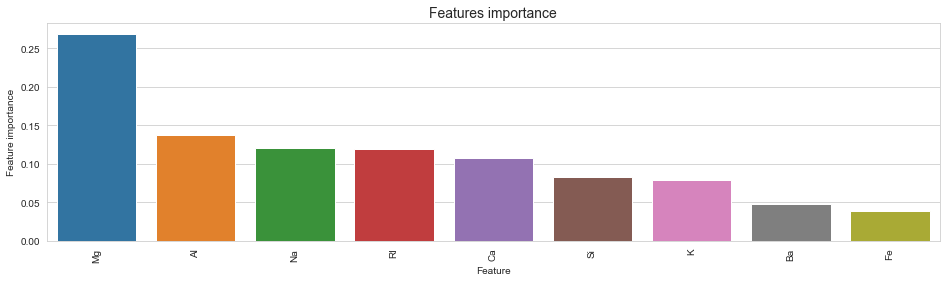

In [81]:
feature_importance_plot(randomForest_classifier)

# Feature Importance Plot (lgb) :

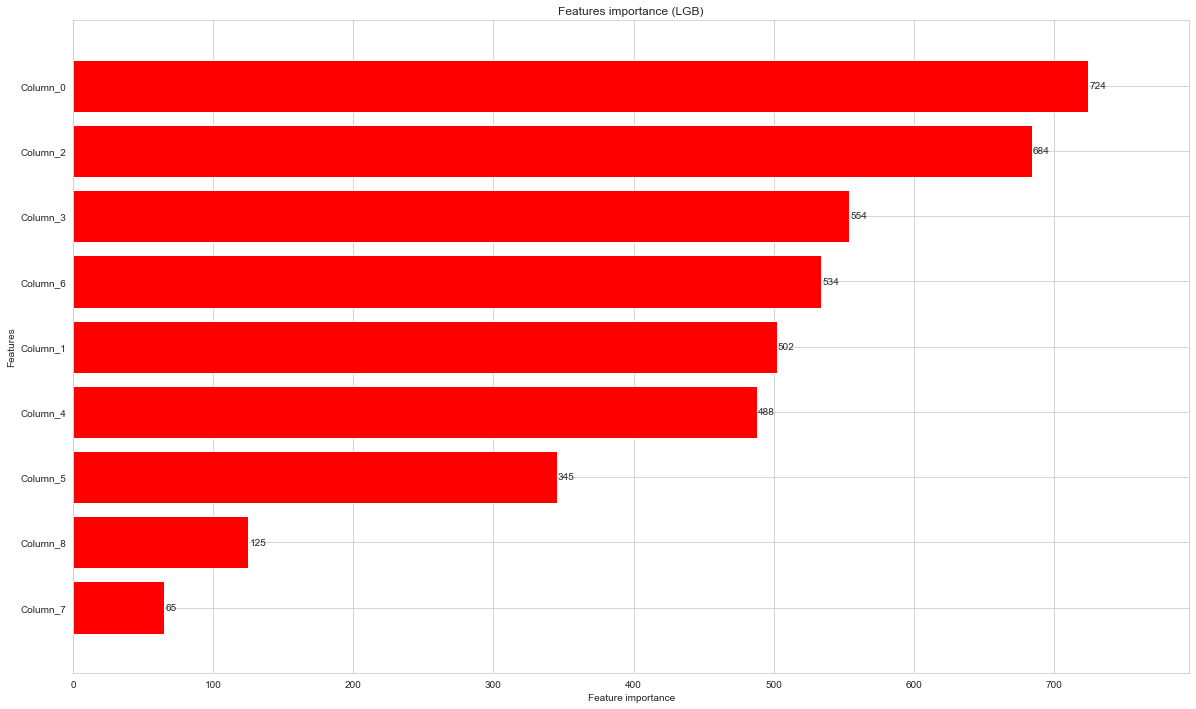

In [82]:
fig, (ax) = plt.subplots(ncols=1, figsize=(20,12))
lgb.plot_importance(lgbm, height=0.8, title="Features importance (LGB)", ax=ax, color="red") 
plt.show()

# Result compilation :

In [83]:
model_results=[
    logisticRegression_result,
    linear_svm_result,
    kernel_svm_result,
    gaussianNB_result,
    kNeighborsClassifier_result,
    baggingClassifier_result,
    sgdClassifier_result,
    decision_classifier_result,
    randomForest_classifier_result,
    adaBoostClassifier_result,
    lgbm_result
]

models = [# Result compilation :
    "logisticRegression",
    "linear_svm",
    "kernel_svm",
    "gaussianNB",
    "kNeighborsClassifier",
    "baggingClassifier",
    "sgdClassifier",
    "decisionTreeClassifier",
    "randomForestClassifier",
    "adaBoostClassifier",
    "lgbm",
]


training_data_results = {
    "model": models,
    "model_accuracy": [model_results[i]['acc_train'] for i in range(len(model_results))],
#     "model_precision": [model_results[i]['prec_train'] for i in range(len(model_results))],    
#     "model_f1": [model_results[i]['f1_train'] for i in range(len(model_results))],    
#     "model_recall": [model_results[i]['recall_train'] for i in range(len(model_results))],    
#     "model_fbeta":[model_results[i]["f_train"] for i in range(len(model_results))],
}

# training_data_results["model_auc"] = []
# for i in range(len(models)):
#     try:
#         training_data_results["model_auc"].append(model_results[i]['auc_train'])
#     except:
#         training_data_results["model_auc"].append(0)
    
testing_data_results = {
    "model": models,
    "model_accuracy": [model_results[i]['acc_test'] for i in range(len(model_results))],
#     "model_precision": [model_results[i]['prec_test'] for i in range(len(model_results))],    
#     "model_f1": [model_results[i]['f1_test'] for i in range(len(model_results))],    
#     "model_recall": [model_results[i]['recall_test'] for i in range(len(model_results))],    
#     "model_accuracy": [model_results[i]['acc_test'] for i in range(len(model_results))],    
#     "model_fbeta":[model_results[i]["f_test"] for i in range(len(model_results))],
}

# testing_data_results["model_auc"] = []
# for i in range(len(models)):
#     try:
#         testing_data_results["model_auc"].append(model_results[i]['auc_train'])
#     except:
#         testing_data_results["model_auc"].append(0)
        
training_data_results = pd.DataFrame(training_data_results)
testing_data_results = pd.DataFrame(testing_data_results)

# Compiled Results for train and test dataset

In [84]:
training_data_results

,model,model_accuracy
0,logisticRegression,0.74375
1,linear_svm,0.77500
2,kernel_svm,0.79375
3,gaussianNB,0.71875
4,kNeighborsClassifier,0.79375
5,baggingClassifier,0.98750
6,sgdClassifier,0.62500
7,decisionTreeClassifier,0.81875
8,randomForestClassifier,1.00000
9,adaBoostClassifier,0.66250


In [85]:
testing_data_results

,model,model_accuracy
0,logisticRegression,0.725
1,linear_svm,0.675
2,kernel_svm,0.725
3,gaussianNB,0.575
4,kNeighborsClassifier,0.675
5,baggingClassifier,0.750
6,sgdClassifier,0.700
7,decisionTreeClassifier,0.750
8,randomForestClassifier,0.900
9,adaBoostClassifier,0.700


# Bar plots to Compare Model performances vs different metrics 

In [86]:
def make_evaluation_plots(data_results,x_axis,y_axis):
    plt.figure(figsize=(12, 6))
    colors = plt.cm.tab20(np.linspace(0, 1, data_results.shape[0]))
    plt.bar(data_results[x_axis], data_results[y_axis], color = colors)
    plt.xticks(rotation=90, ha='right')
    plt.xlabel(x_axis)
    plt.ylabel(y_axis)
    plt.title(f"{y_axis}")
    plt.tight_layout()

    # Display the plot
    plt.show()# Bar plots to Compare Model performances vs different metrics 

In [87]:
eval_cols = training_data_results.columns
eval_cols

Index(['model', 'model_accuracy'], dtype='object')

# Bar plots to Compare Model performances vs different metrics over Training Data

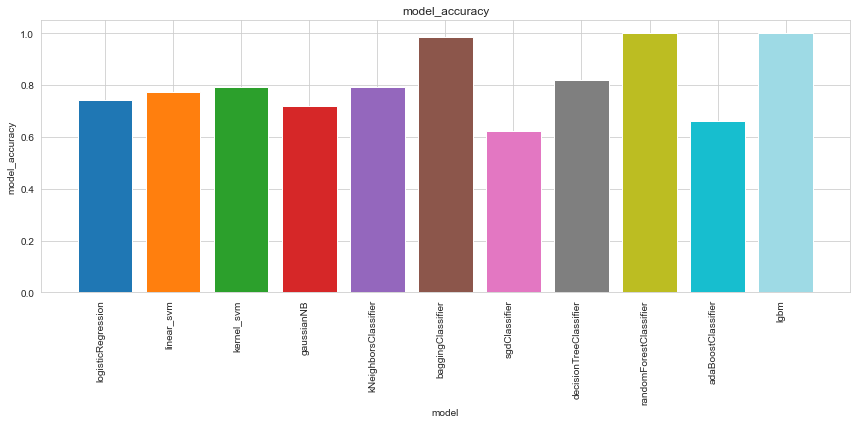

In [88]:
for i in range(1,len(eval_cols)):
    make_evaluation_plots(training_data_results,eval_cols[0],eval_cols[i])

# Bar plots to Compare Model performances vs different metrics over Testing Data

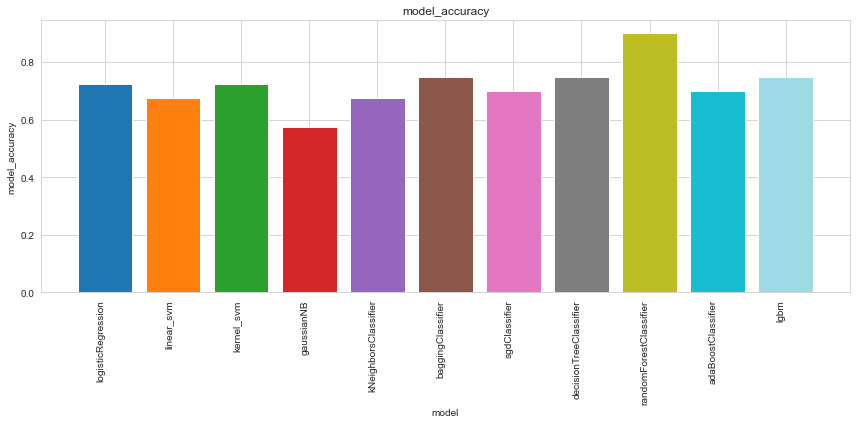

In [89]:
for i in range(1,len(eval_cols)):
    make_evaluation_plots(testing_data_results,eval_cols[0],eval_cols[i])

# Best values obtained from all the models combined

In [90]:
# Best values obtained from all the models combined
testing_data_results.describe().T['max']

model_accuracy    0.9
Name: max, dtype: float64

# BEST PERFORMER :

In [95]:
print('Accuracy : '+str(randomForest_classifier_result['acc_test']))
print("Classification Report : ")
print(randomForest_classifier_result['classification_report_test'])

Accuracy : 0.9
Classification Report : 
              precision    recall  f1-score   support

           1       1.00      0.93      0.96        14
           2       0.88      0.93      0.90        15
           3       0.67      0.67      0.67         3
           5       1.00      0.67      0.80         3
           6       1.00      1.00      1.00         2
           7       0.75      1.00      0.86         3

    accuracy                           0.90        40
   macro avg       0.88      0.87      0.86        40
weighted avg       0.91      0.90      0.90        40

